# GroupMeme Demo

Here, we're just going to use GroupMeme to load one of your groupchats and see who gets the most likes, who sends the most messages, and who likes the most messages.

First, we just do simple imports

In [7]:
import sys

import groupmeme
import groupmeme.api as api
import groupmeme.group as group
import json

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


## Loading Groups
Here we load the groups that we are a part of. `CLIENT.get_groups()` returns the groups in a dictionary. The keys are the names of the groups and the values are the API response that contains all the data for that group.

Change the `selected_group` variable to be the name of the group you want to analyze.

#### Speed
Note that the `collect_messages()` function call will take a long time (~10 minutes for 20K messages.) 

In [8]:
CLIENT = api.GroupmeClient()
groups = CLIENT.get_groups()

print("GROUPS: ")
for name in groups:
    print "\t{}".format(name)

selected_group = "SEP Actives" # Change this!!

sep_dict = groups[selected_group]
sep = group.Group(sep_dict["id"])


sep.collect_messages()
sep.handle_messages()

GROUPS: 
	CS 70 boyz
	Fundraising
	Bowles ExComm SPR '14
	Interviews
	SEP Actives
	2129 Channing
	Benatia
	CS Job Recruiting
	SEP ETA CLASS
	ETA dudes retreat car


### Names
The users are stored in our dataframe as their groupme id's, but this makes it hard for us to see who they are. Here we convert them.

In [9]:
def convert_to_name(df, labels, id_to_name):
    for label in labels:
        df[label] = df[label].map(id_to_name)
    return df
id_to_name = sep.id_to_name
messages = convert_to_name(sep.messages, ["sender_id"], id_to_name)
likes = convert_to_name(sep.likes, ["liker_id", "receiver_id"], id_to_name)




# Who Sends the Most Messages?




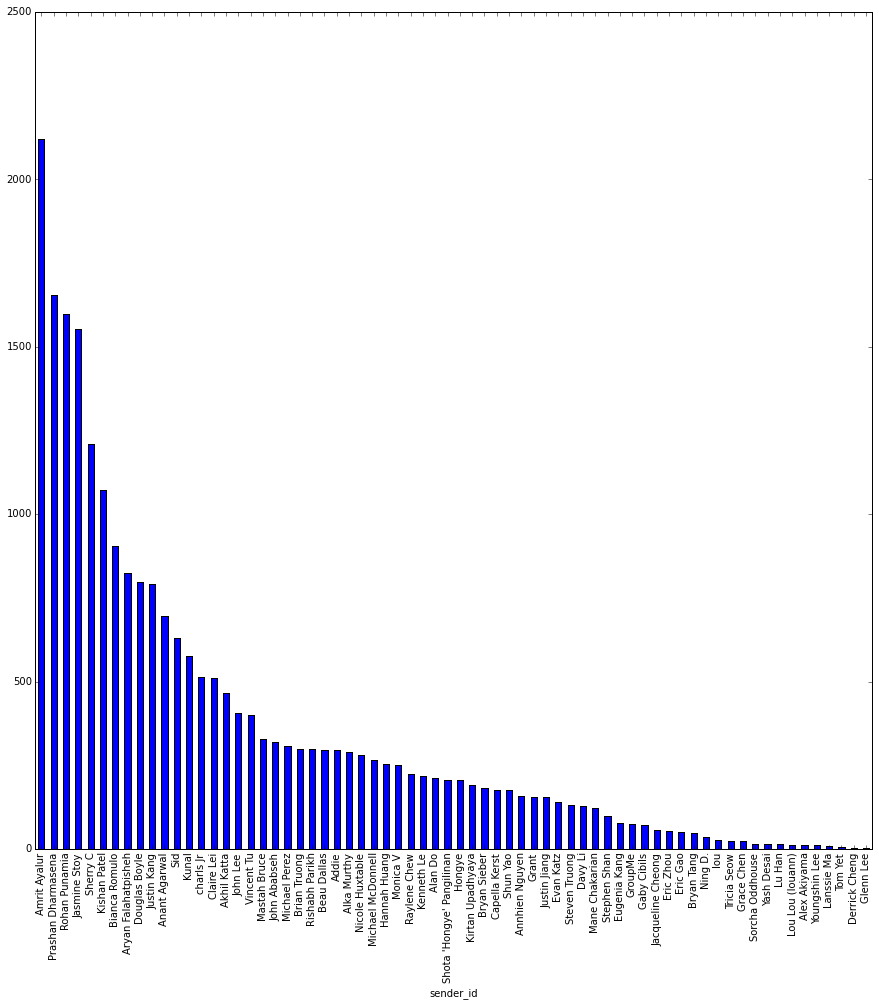

In [10]:
messages.groupby("sender_id").size().sort_values(ascending=False).plot(kind="bar", figsize=(15,15))



# Who Likes the Most Messages?




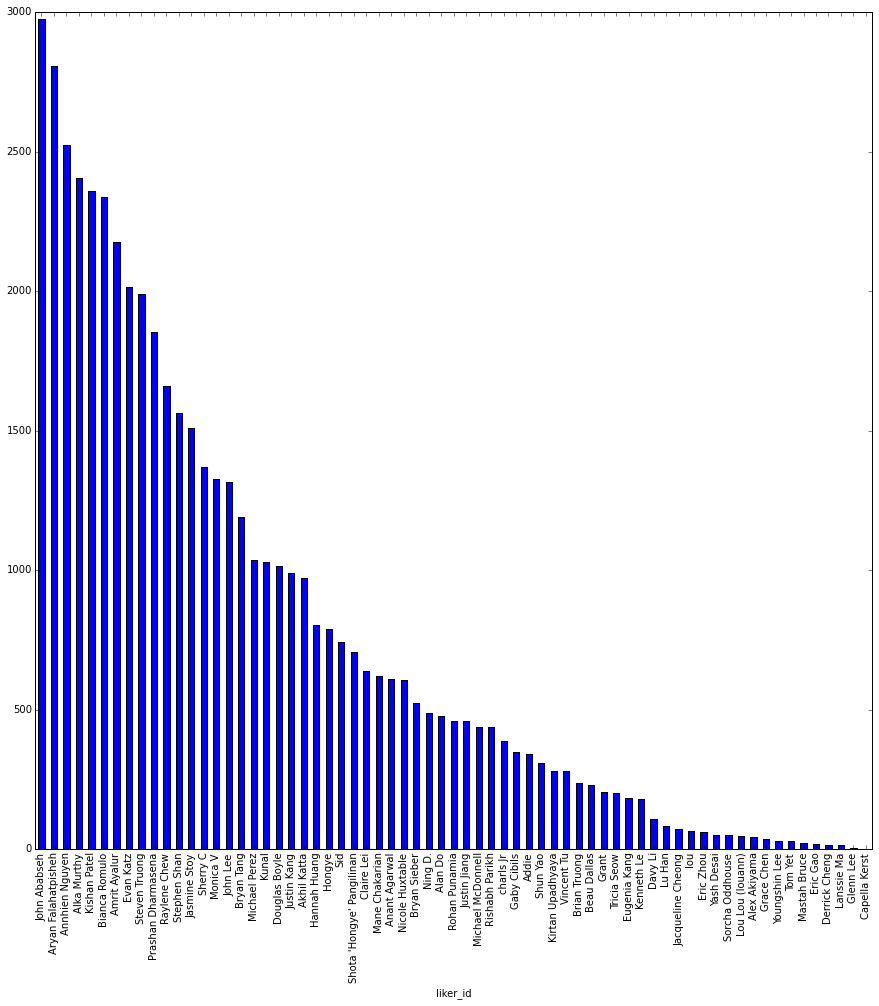

In [11]:
likes.groupby("liker_id").size().sort_values(ascending=False).plot(kind="bar", figsize=(15,15))



# Who Gets the Most Likes?

Finally, an objective standard for the a person's worth: their Groupme karma


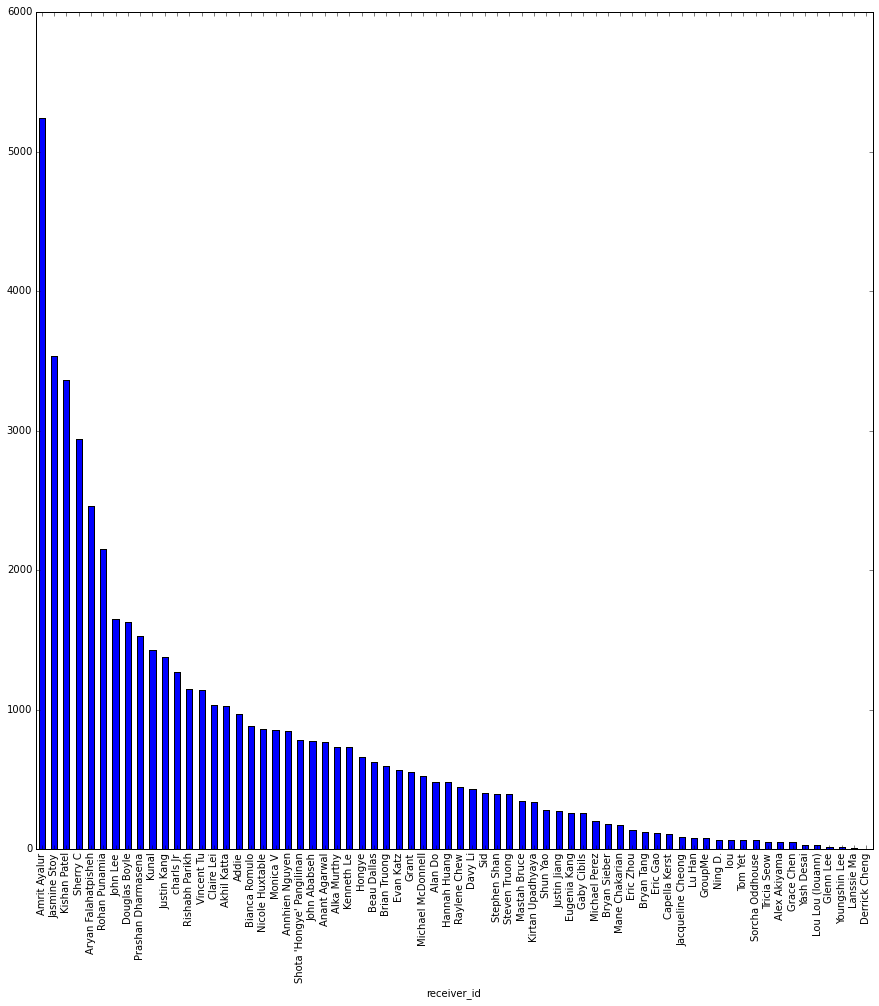

In [12]:
likes.groupby("receiver_id").size().sort_values(ascending=False).plot(kind="bar", figsize=(15,15))